##### Copyright 2019 The TensorFlow Authors.


SUBTASK 1
Reading the dataset...
Printing after success reading file
             first name Group  \
Last name                       
БЕЗЗЕМЕЛЬНИЙ  Костянтин     A   
БІРЮКОВ          Дмитро     A   
БОНДАРЕНКО    Єлизавета     A   
БРЕСЛАВЕЦЬ      Михайло     A   
ГАЛЬПЕРІН        Максим     A   
...                 ...   ...   
ТЮПА              Павло     C   
ТЮРІН            Богдан     C   
УШКАЛОВ          Нікіта     C   
ШЕВЧЕНКО      Олександр     C   
ШЕХОВЦОВ         Дмитро     C   

             The national grading scale Artificial Intelligence  \
Last name                                                         
БЕЗЗЕМЕЛЬНИЙ                                          excellent   
БІРЮКОВ                                                    good   
БОНДАРЕНКО                                            excellent   
БРЕСЛАВЕЦЬ                                         satisfactory   
ГАЛЬПЕРІН                                                  good   
...                            

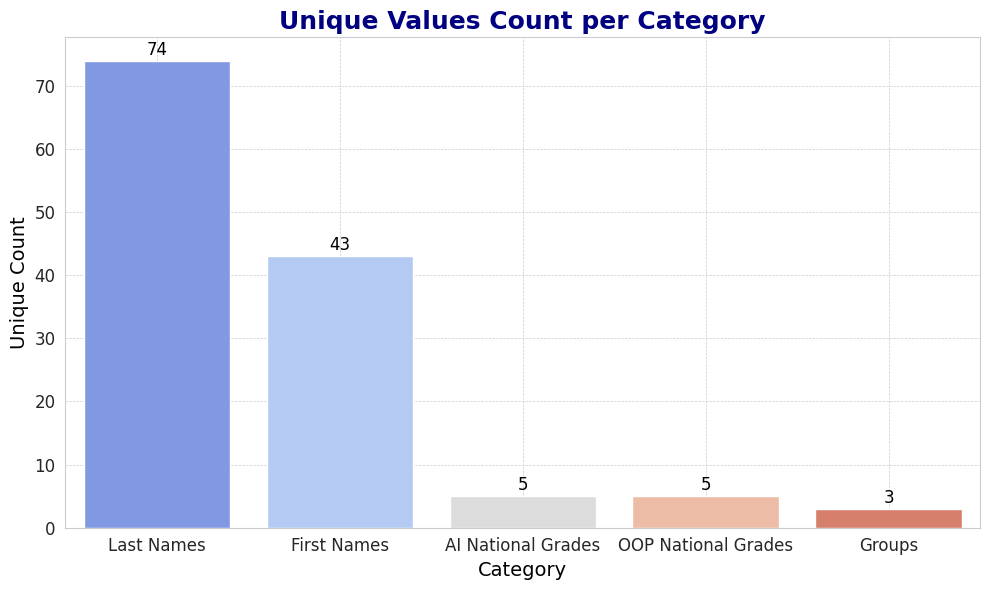


SUBTASK 3
Reading the dataset...
Printing after success reading file
       Last name first name Group  \
0   БЕЗЗЕМЕЛЬНИЙ  Костянтин     A   
1        БІРЮКОВ     Дмитро     A   
2     БОНДАРЕНКО  Єлизавета     A   
3     БРЕСЛАВЕЦЬ    Михайло     A   
4      ГАЛЬПЕРІН     Максим     A   
..           ...        ...   ...   
70          ТЮПА      Павло     C   
71         ТЮРІН     Богдан     C   
72       УШКАЛОВ     Нікіта     C   
73      ШЕВЧЕНКО  Олександр     C   
74      ШЕХОВЦОВ     Дмитро     C   

    The national grading scale Artificial Intelligence  \
0                                                   5    
1                                                   4    
2                                                   5    
3                                                   3    
4                                                   4    
..                                                ...    
70                                                  3    
71                   

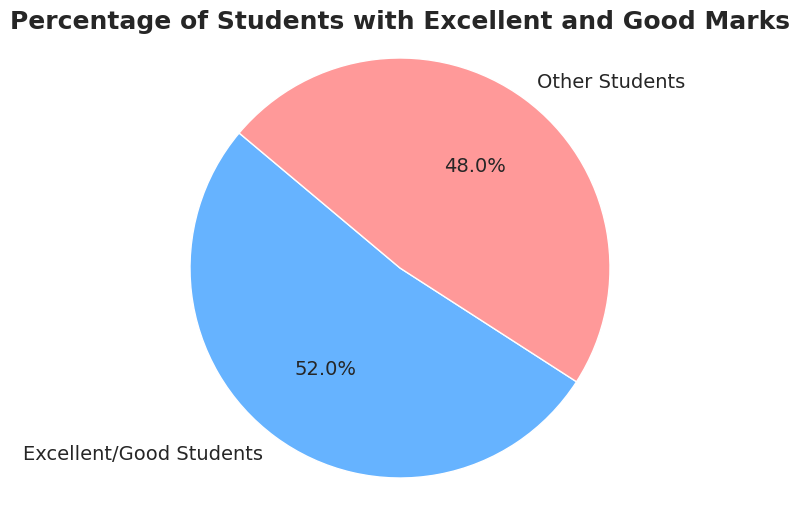

<ipython-input-2-de0d0b7ae2f1>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette=colors)


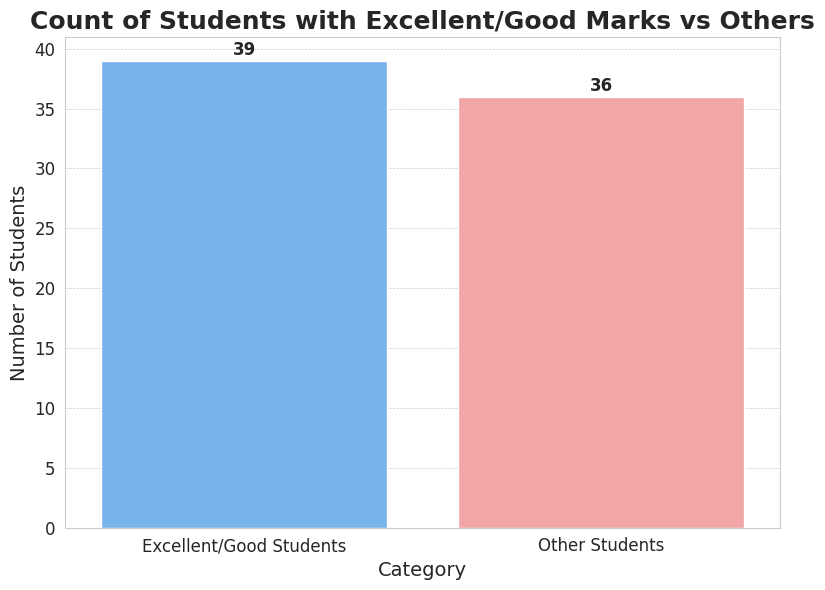

<ipython-input-2-de0d0b7ae2f1>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



SUBTASK 4
Printing unsatisfactory mark's count by groups
  Group  Number of Unsatisfactory Students
0     A                                  2
1     B                                  8
2     C                                  6


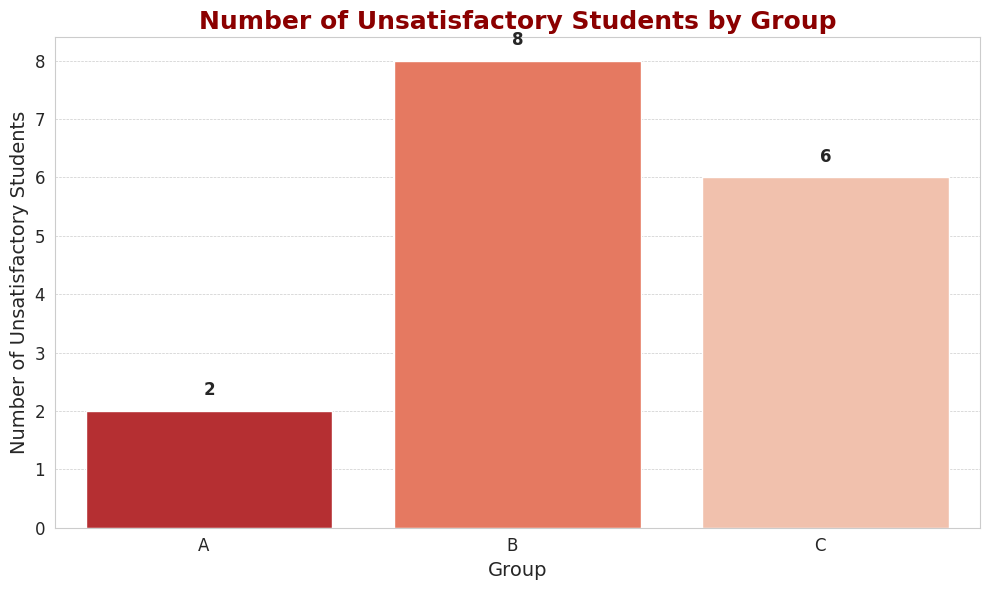


SUBTASK 5


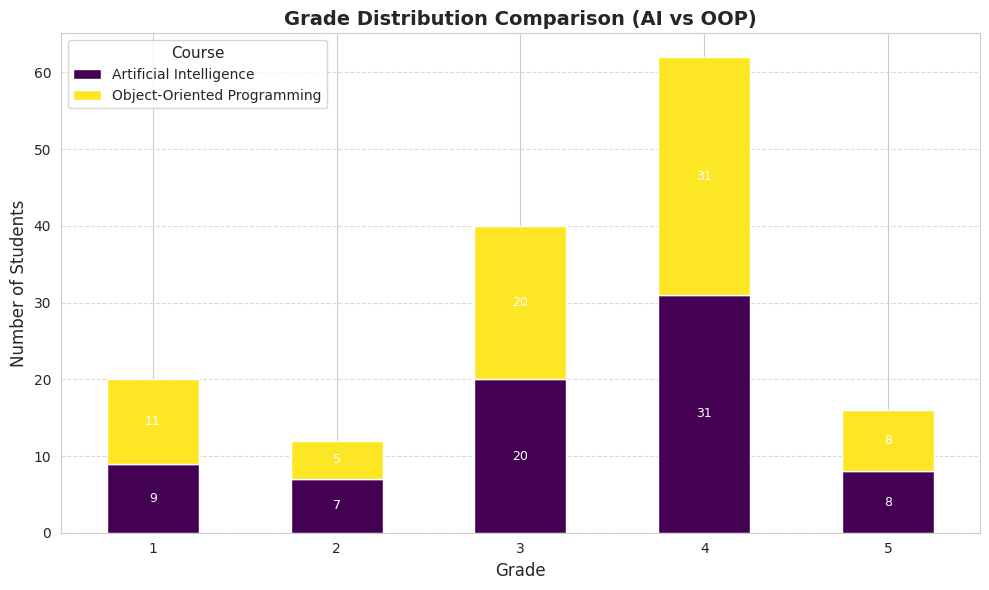


SUBTASK 6

Students with unique names and same marks in each group:
  Group  Unique_Names_Count  Same_Marks_Count  Different_Marks_Count
0     A                  26                26                      0
1     B                  25                24                      1
2     C                  24                23                      1


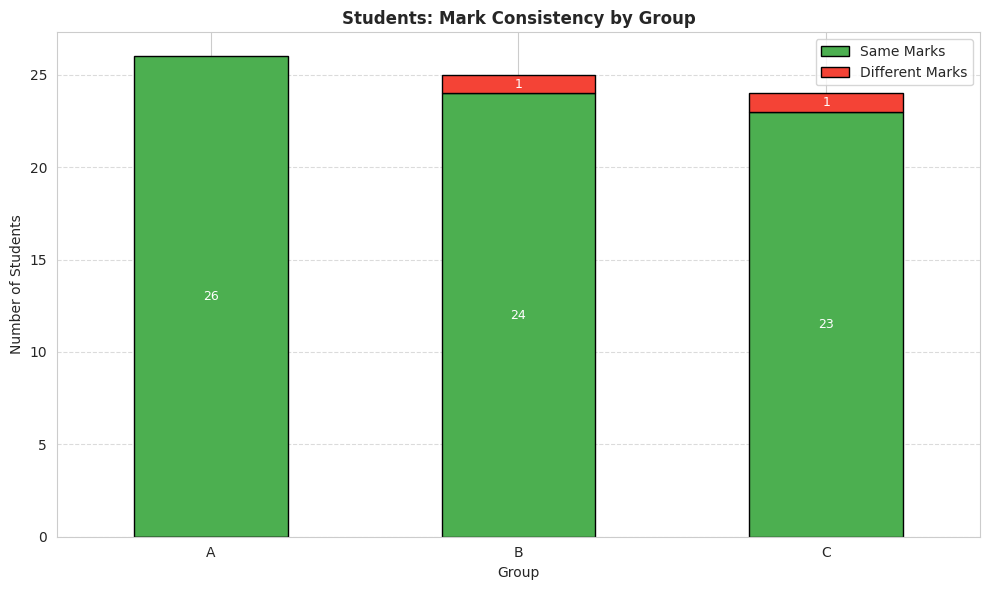

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("==============================================================================\n")
print("SUBTASK 1")
print('Reading the dataset...')
df = pd.read_excel('2_workshop_DataSet.xlsx', index_col=0, engine='openpyxl')

print("Printing after success reading file")
print(df)

print("==============================================================================\n")
print("SUBTASK 2")
df = df.reset_index()

last_names_unique = df['Last name'].unique().tolist()
first_names_unique = df['first name'].unique().tolist()
groups_unique = df['Group'].unique().tolist()
ai_national_grades_unique = df['The national grading scale Artificial Intelligence'].unique().tolist()
oop_national_grades_unique = df['The national grading scale Object-Oriented Programming'].unique().tolist()

print("Unique last names:", last_names_unique)
print("Unique first names:", first_names_unique)
print("Unique groups:", groups_unique)
print("Unique AI national grades:", ai_national_grades_unique)
print("Unique OOP national grades:", oop_national_grades_unique)

data = {
    'Category': ['Last Names', 'First Names', 'Groups', 'AI National Grades', 'OOP National Grades'],
    'Unique Count': [
        len(last_names_unique),
        len(first_names_unique),
        len(groups_unique),
        len(ai_national_grades_unique),
        len(oop_national_grades_unique)
    ]
}

plot_df = pd.DataFrame(data)

plot_df = plot_df.sort_values(by='Unique Count', ascending=False)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Unique Count', hue='Category', data=plot_df, palette='coolwarm', legend=False)

plt.title('Unique Values Count per Category', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Category', fontsize=14, color='black')
plt.ylabel('Unique Count', fontsize=14, color='black')

plt.grid(True, linestyle='--', linewidth=0.5)

plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 8),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

print("==============================================================================\n")
print("SUBTASK 3")
print('Reading the dataset...')
new_df = pd.read_excel('Lab_2_DataSet.xlsx', engine='openpyxl')

print("Printing after success reading file")
print(new_df)
filtered_students = new_df[
    (new_df['The national grading scale Artificial Intelligence'].isin([4, 5])) &
    (new_df['The national grading scale Object-Oriented Programming'].isin([4, 5]))
]

total_filtered_students = filtered_students.shape[0]
total_students = df.shape[0]
other_students = total_students - total_filtered_students

print(f'The number of students with only excellent and good marks in all groups: {total_students}')

print(f'Total students: {total_students}')
print(f'Students with only excellent and good marks: {total_filtered_students}')
print(f'Other students: {other_students}')

labels = ['Excellent/Good Students', 'Other Students']
sizes = [total_filtered_students, other_students]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Percentage of Students with Excellent and Good Marks', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=sizes, palette=colors)

plt.title('Count of Students with Excellent/Good Marks vs Others', fontsize=18, fontweight='bold')
plt.ylabel('Number of Students', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(sizes):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("==============================================================================\n")
print("SUBTASK 4")
unsatisfactory_students = new_df[
    (new_df['The national grading scale Artificial Intelligence'].isin([1, 2])) &
    (new_df['The national grading scale Object-Oriented Programming'].isin([1, 2]))
]

unsatisfactory_by_group = unsatisfactory_students.groupby('Group').size().reset_index(name='Number of Unsatisfactory Students')

print("Printing unsatisfactory mark's count by groups")
print(unsatisfactory_by_group)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=unsatisfactory_by_group,
    x='Group',
    y='Number of Unsatisfactory Students',
    palette='Reds_r'
)

plt.title('Number of Unsatisfactory Students by Group', fontsize=18, fontweight='bold', color='darkred')
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of Unsatisfactory Students', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

for i in range(len(unsatisfactory_by_group)):
    plt.text(
        i,
        unsatisfactory_by_group['Number of Unsatisfactory Students'][i] + 0.2,
        str(unsatisfactory_by_group['Number of Unsatisfactory Students'][i]),
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()

print("==============================================================================\n")
print("SUBTASK 5")
plt.close('all')

grade_counts_ai = new_df['The national grading scale Artificial Intelligence'].value_counts().sort_index()
grade_counts_oop = new_df['The national grading scale Object-Oriented Programming'].value_counts().sort_index()

plot_data = pd.DataFrame({
    'Artificial Intelligence': grade_counts_ai,
    'Object-Oriented Programming': grade_counts_oop
})

fig, ax = plt.subplots(figsize=(10, 6))
plot_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

plt.title('Grade Distribution Comparison (AI vs OOP)', fontsize=14, fontweight='bold')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Course', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, grade in enumerate(plot_data.index):
    ai_count = plot_data.loc[grade, 'Artificial Intelligence']
    oop_count = plot_data.loc[grade, 'Object-Oriented Programming']

    if ai_count > 0:
        ax.text(i, ai_count / 2, str(ai_count),
                ha='center', va='center', fontsize=9, color='white')
    if oop_count > 0:
        ax.text(i, ai_count + oop_count / 2, str(oop_count),
                ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

print("==============================================================================\n")
print("SUBTASK 6")
plt.close('all')

task6_df = new_df.copy()

task6_df['Full Name'] = task6_df['first name'] + ' ' + task6_df['Last name']

task6_df['SameMarks'] = task6_df['The national grading scale Artificial Intelligence'] == task6_df[
    'The national grading scale Object-Oriented Programming']

result_df = task6_df.groupby('Group').agg(
    Unique_Names_Count=('Full Name', 'nunique'),
    Same_Marks_Count=('SameMarks', lambda x: sum(x == True)),
    Different_Marks_Count=('SameMarks', lambda x: sum(x == False))
).reset_index()

print("\nStudents with unique names and same marks in each group:")
print(result_df)

fig, ax = plt.subplots(figsize=(10, 6))
result_df.plot(x='Group', y=['Same_Marks_Count', 'Different_Marks_Count'],
               kind='bar', stacked=True, ax=ax,
               color=['#4CAF50', '#F44336'], edgecolor='black')

plt.title('Students: Mark Consistency by Group', fontsize=12, fontweight='bold')
plt.xlabel('Group', fontsize=10)
plt.ylabel('Number of Students', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Same Marks', 'Different Marks'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, row in result_df.iterrows():
    same = row['Same_Marks_Count']
    diff = row['Different_Marks_Count']

    if same > 0:
        ax.text(i, same / 2, str(same), ha='center', va='center', fontsize=9, color='white')
    if diff > 0:
        ax.text(i, same + diff / 2, str(diff), ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
